# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Data.csv')

In [3]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [4]:
r2_values=[]
regression_types=["Linear","Polynomial","Support Vector","Decision Tree","Random Forest"]

# Dataset split between training set and test set

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

# Multiple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[431.43, 431.23],
       [458.56, 460.01],
       [462.75, 461.14],
       ...,
       [469.52, 473.26],
       [442.42, 438.  ],
       [461.88, 463.28]])

In [7]:
from sklearn.metrics import r2_score
r2_values.append(r2_score(y_test, y_pred))

# Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y_train)

y_pred1=lin_reg.predict(poly_reg.transform(x_test))
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[433.94 431.23]
 [457.9  460.01]
 [460.52 461.14]
 ...
 [469.53 473.26]
 [438.27 438.  ]
 [461.67 463.28]]


In [9]:
from sklearn.metrics import r2_score
r2_values.append(r2_score(y_test,y_pred1))

# Support Vector Regression(SVM)

Feature Scaling to avoid dominance of any one feature over another

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
x_scaled=sc_X.fit_transform(x_train)
sc_Y=StandardScaler()
y_scaled=sc_Y.fit_transform(y_train.reshape(len(y_train),1))

In [11]:
from sklearn.svm import SVR
reg=SVR(kernel='rbf')
reg.fit(x_scaled,y_scaled)

y_pred2=sc_Y.inverse_transform(reg.predict(sc_X.transform(x_test)))
np.concatenate((y_pred2.reshape(len(y_pred2),1),y_test.reshape(len(y_test),1)),1)

C:\Users\OMEN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[434.05, 431.23],
       [457.94, 460.01],
       [461.03, 461.14],
       ...,
       [470.6 , 473.26],
       [439.42, 438.  ],
       [460.92, 463.28]])

In [12]:
from sklearn.metrics import r2_score
r2_values.append(r2_score(y_test,y_pred2))

# Decision Tree Regression

In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr_reg=DecisionTreeRegressor(random_state=0)
dtr_reg.fit(x_train,y_train)

y_pred3=dtr_reg.predict(x_test)
np.concatenate((y_pred3.reshape(len(y_pred3),1),y_test.reshape(len(y_test),1)),1)

array([[431.28, 431.23],
       [459.59, 460.01],
       [460.06, 461.14],
       ...,
       [471.46, 473.26],
       [437.76, 438.  ],
       [462.74, 463.28]])

In [14]:
from sklearn.metrics import r2_score
r2_values.append(r2_score(y_test,y_pred3))

# Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr_reg=RandomForestRegressor(n_estimators=10,random_state=0)
rfr_reg.fit(x_train,y_train)

y_pred4=rfr_reg.predict(x_test)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[434.05 431.23]
 [458.79 460.01]
 [463.02 461.14]
 ...
 [469.48 473.26]
 [439.57 438.  ]
 [460.38 463.28]]


In [16]:
from sklearn.metrics import r2_score
r2_values.append(r2_score(y_test,y_pred4))
print(r2_values)

[0.9325315554761303, 0.9458193275327722, 0.948078404998626, 0.922905874177941, 0.9615908334363876]


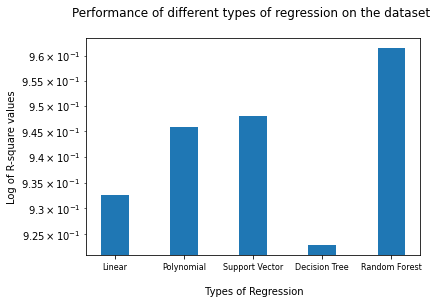

In [22]:
plt.bar(regression_types,r2_values,width=0.4)
plt.yscale("log")
plt.tick_params(axis='x', which='major', labelsize=8)
plt.xlabel("\n Types of Regression")
plt.ylabel("Log of R-square values")
plt.title("Performance of different types of regression on the dataset \n")
plt.show()